# Grid Search y Random Search: Métodos de búsqueda de hiperparámetros


### Grid search 
Es una búsqueda exhaustiva donde se prueban todas las combinaciones posibles de hiperparámetros en una grilla definida.

Ventajas:
- Encuentra la mejor combinación dentro del conjunto de hiperparámetros definido.
- Es reproducible y garantiza la mejor solución dentro de la grilla.

Desventajas:
- Muy costoso computacionalmente si hay muchos hiperparámetros y valores posibles.
- No explora valores fuera de la grilla definida.


### RandomSearch 

En lugar de probar todas las combinaciones, selecciona valores aleatorios dentro de un rango predefinido.

Ventajas:
- Más rápido que Grid Search.
- Permite explorar un espacio más amplio de hiperparámetros.

Desventajas:
- No garantiza encontrar la mejor combinación absoluta, pero sí una buena solución en menos tiempo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# --- Limpieza de datos ---
df = pd.read_csv('Data/titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

# Variables predictoras y objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# --- División en conjunto de entrenamiento y test (80%-20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### KNN

In [2]:
# Definir pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de datos
    ('knn', KNeighborsClassifier())  
])

params_grid = {
    'knn__n_neighbors': np.arange(1, 21), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}

GridSearch

In [3]:
# Configurar GridSearchCV, estimator, params_grid, cv, n_jobs, scoring
grid_search = GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [4]:
grid_search.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__weights': 'uniform'}

In [5]:
prob_knn_grid = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=prob_knn_grid, y_true=y_test)

0.8729844494175705

Random Search

In [6]:
# Random search, estimator, params_dist, n_iter, cv, n_jobs
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
random_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan'],
                                        'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='roc_auc')

In [7]:
random_search.best_params_

{'knn__weights': 'uniform', 'knn__n_neighbors': 6, 'knn__metric': 'manhattan'}

In [8]:
random_knn = random_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=random_knn, y_true=y_test)

0.8561427669707924

### Regresion logistica

In [9]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  # grado se definirá en grid search
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))
])


In [10]:
# Grid Search 
# Parametros a buscar, polinomial degree, logistic regression C 
params_grid = {
     'poly__degree': [1, 2, 3],
     'logreg__penalty': ['l2', None],
     'logreg__C': [0.01, 0.1, 1]
}

log_reg_grid = GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=No

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1],
                         'logreg__penalty': ['l2', None],
                         'poly__degree': [1, 2, 3]},
             scoring='roc_auc')

In [11]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'poly__degree': 2}

In [12]:
probabilities_log_reg_grid = log_reg_grid.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=probabilities_log_reg_grid, y_true=y_test)

0.8820221495380731

In [13]:
# Random search
log_reg_random = RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=No

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scaler', StandardScaler()),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'logreg__C': [0.01, 0.1, 1],
                                        'logreg__penalty': ['l2', None],
                                        'poly__degree': [1, 2, 3]},
                   scoring='roc_auc')

In [14]:
log_reg_random.best_params_

{'poly__degree': 2, 'logreg__penalty': 'l2', 'logreg__C': 0.1}

In [15]:
probabilities_log_reg_random = log_reg_random.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_score=probabilities_log_reg_random, y_true=y_test)

0.8820221495380731

## AUC continuación

Ejemplo, crédito:

Si tomas al azar una persona que si pago y una persona que no pago

El AUC es la probabilidad de que la persona que si pago tenga una predicción mayor


In [16]:
### AUC 
df_auc = pd.DataFrame({
     'probabilidad': probabilities_log_reg_random,
     'y_true': y_test
})

In [17]:
resultados = []
for i in range(10000):
     muestra_sobrevive = df_auc[df_auc.y_true == 1].sample()['probabilidad'].values[0]
     muestra_muere = df_auc[df_auc.y_true == 0].sample()['probabilidad'].values[0]
     resultados.append(muestra_sobrevive > muestra_muere)

np.mean(resultados)

0.8802

### Intervalo de confianza

In [18]:
auc_bootstrap = []
for i in range(10000):
     flag_frame = df_auc.sample(len(df_auc), replace=True)
     auc_bootstrap.append(roc_auc_score(y_score=flag_frame['probabilidad'], y_true=flag_frame['y_true']))

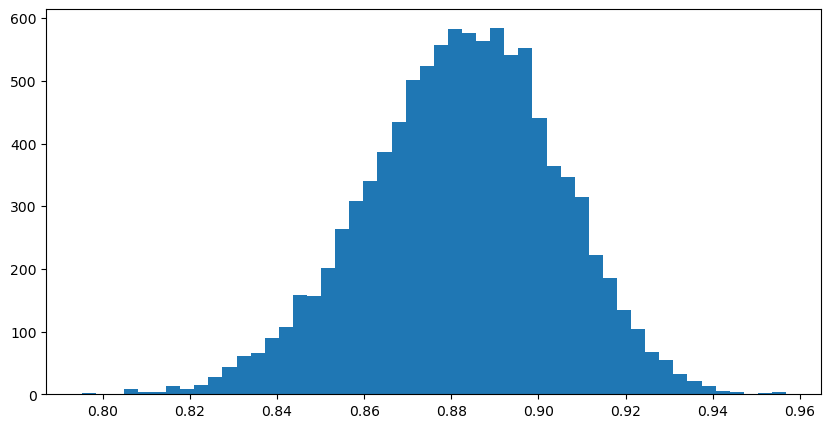

In [19]:
plt.figure(figsize=(10, 5))
plt.hist(auc_bootstrap, bins=50)
plt.show()

In [20]:
df_auc_bootstrap = pd.DataFrame({
     'auc': auc_bootstrap
})

(df_auc_bootstrap.auc > 0.9).mean()

0.2111

### Intervalo de confianza AUC 95%

In [21]:
# 1 --> Obtenemos el error estandard
se_auc = df_auc_bootstrap.auc.std()

In [22]:
np.mean(auc_bootstrap) - 1.96 * se_auc, np.mean(auc_bootstrap) + 1.96 * se_auc

(0.8394554293374403, 0.9253138483767529)

### Regresión logistica con pesos 

Ejemplo, darle más peso a las personas más jovenes

In [23]:
model = LogisticRegression().fit(X_train, y_train)
prediccion_normal = model.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
weights = 1 / X_train['Age']

In [25]:
model_weighted = LogisticRegression().fit(X_train, y_train, sample_weight=weights)
predicciones_weighted = model_weighted.predict_proba(X_test)[:, 1]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
df_weighted = pd.DataFrame({
     'age': X_test['Age'],
     'y_true': y_test,
     'prob_normal': prediccion_normal,
     'prob_weighted': predicciones_weighted
})
df_weighted

,age,y_true,prob_normal,prob_weighted
709,29.699118,1,0.156659,0.305223
439,31.000000,0,0.210086,0.340290
840,20.000000,0,0.135177,0.360297
720,6.000000,1,0.857614,0.915729
39,14.000000,1,0.779521,0.701382
...,...,...,...,...
821,27.000000,1,0.112538,0.238902
633,29.699118,0,0.387669,0.577258
456,65.000000,0,0.189966,0.062805
500,17.000000,0,0.146356,0.419076
